alpha = 0.5772058013180805
alpha = 0.5772058013180805
effective_trap_depth = 3.63110687e-26
effective_trap_depth = 3.63110687e-26


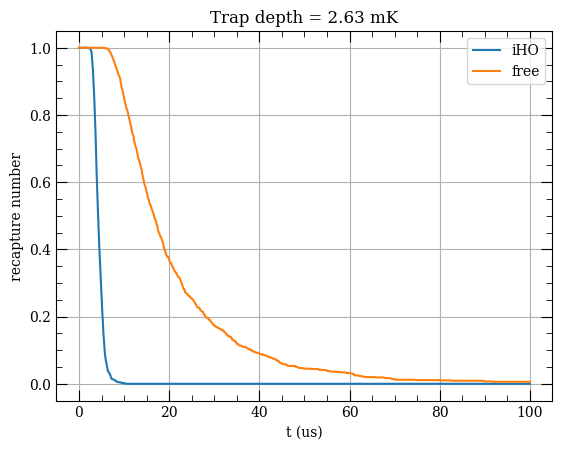

In [1]:
# test of the final standard code
from arc import *
import numpy as np
from matplotlib import pyplot as plt

atom = Caesium()
omega_H = 0.8e6 #Hz
omega_L = 0.19e6 #Hz
T = 20e-6 #168e-6 #K
N_ensemble = 1000
traping_laser = 1070e-9 #nm
D2_line = 852e-9 #nm
trap_temp = 2.63e-3 #K
t = np.linspace(0, 100, 1000)*1e-6
m = atom.mass

from Monte_Carlo import Monte_Carlo_iHO_3d, Monte_Carlo_free_3d, recature_rate_3d

iHO_x_ensemble, iHO_vx_ensemble, iHO_y_ensemble, iHO_vy_ensemble, iHO_z_ensemble, iHO_vz_ensemble = Monte_Carlo_iHO_3d(atom, t, omega_H, omega_L, T, N_ensemble, traping_laser, D2_line)
free_x_ensemble, free_vx_ensemble,  free_y_ensemble, free_vy_ensemble, free_z_ensemble, free_vz_ensemble = Monte_Carlo_free_3d(atom, t, omega_H, omega_L, T, N_ensemble, traping_laser, D2_line)


recapture_rate_iHO = recature_rate_3d(trap_temp, iHO_x_ensemble, iHO_vx_ensemble, iHO_y_ensemble, iHO_vy_ensemble, iHO_z_ensemble, iHO_vz_ensemble, t, m, omega_H, omega_L)
recapture_rate_free = recature_rate_3d(trap_temp, free_x_ensemble, free_vx_ensemble, free_y_ensemble, free_vy_ensemble, free_z_ensemble, free_vz_ensemble, t, m, omega_H, omega_L)

plt.plot(t*1e6, recapture_rate_iHO, label = 'iHO')
plt.plot(t*1e6, recapture_rate_free, label = 'free')
plt.xlabel('t (us)')
plt.ylabel('recapture number')
plt.legend(loc='best')
plt.title(f'Trap depth = {trap_temp*1e3} mK')
plt.grid()
plt.show()